How do banks know whether or not to approve you for a credit card based on just some information about you? Thanks to Machine Learning (ML), many banks were able to create their own model of predicting how reliable an applicant is. for this project, I will apply different Classification ML models into the data and pick out which model perform the best (the highest accuracy).

# Importing libraries and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("clean_dataset.csv")

# Data Overview

In [4]:
df.head()


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
print(df.columns)


Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')


In [8]:
cols = ['Industry', 'Ethnicity', 'Citizen']

for col in cols:
    print(f'--- {col} ---')
    print(df[col].unique())
    print('\n')

--- Industry ---
['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']


--- Ethnicity ---
['White' 'Black' 'Asian' 'Latino' 'Other']


--- Citizen ---
['ByBirth' 'ByOtherMeans' 'Temporary']




In [9]:
print(f'Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}')

Number of rows: 690
Number of columns: 16


In [10]:
print(f'Number of null values: {df.isnull().values.sum()}')
print(f'Number of duplicated values: {df.duplicated().values.sum()}')

Number of null values: 0
Number of duplicated values: 0


In [11]:
ms=df[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 
     'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense',  'ZipCode', 'Income', 'Approved']]

In [12]:
ms = df.corr()
ms


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
Gender,1.000000,0.035044,-0.041746,-0.068062,-0.071250,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.086007,-0.002063,-0.028934
Age,0.035044,1.000000,0.202177,0.106929,0.099477,0.391464,0.204434,0.086037,0.187327,0.053599,-0.078690,0.018719,0.164086
Debt,-0.041746,0.202177,1.000000,0.074649,0.083781,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.217903,0.123121,0.206294
Married,-0.068062,0.106929,0.074649,1.000000,0.992033,0.069945,0.145073,0.175428,0.113968,-0.009784,-0.017074,-0.006899,0.180583
BankCustomer,-0.071250,0.099477,0.083781,0.992033,1.000000,0.075905,0.138535,0.170268,0.111077,-0.002402,-0.009513,0.057273,0.188964
YearsEmployed,0.086544,0.391464,0.298902,0.069945,0.075905,1.000000,0.345689,0.222982,0.322330,0.138139,-0.070495,0.051345,0.322475
PriorDefault,-0.026047,0.204434,0.244317,0.145073,0.138535,0.345689,1.000000,0.432032,0.379532,0.091276,-0.055010,0.090012,0.720407
Employed,-0.077784,0.086037,0.174846,0.175428,0.170268,0.222982,0.432032,1.000000,0.571498,0.017043,-0.044834,0.077652,0.458301
CreditScore,-0.024630,0.187327,0.271207,0.113968,0.111077,0.322330,0.379532,0.571498,1.000000,0.006944,-0.112816,0.063692,0.406410
DriversLicense,0.051674,0.053599,-0.013023,-0.009784,-0.002402,0.138139,0.091276,0.017043,0.006944,1.000000,0.154924,0.019201,0.031625


<AxesSubplot:>

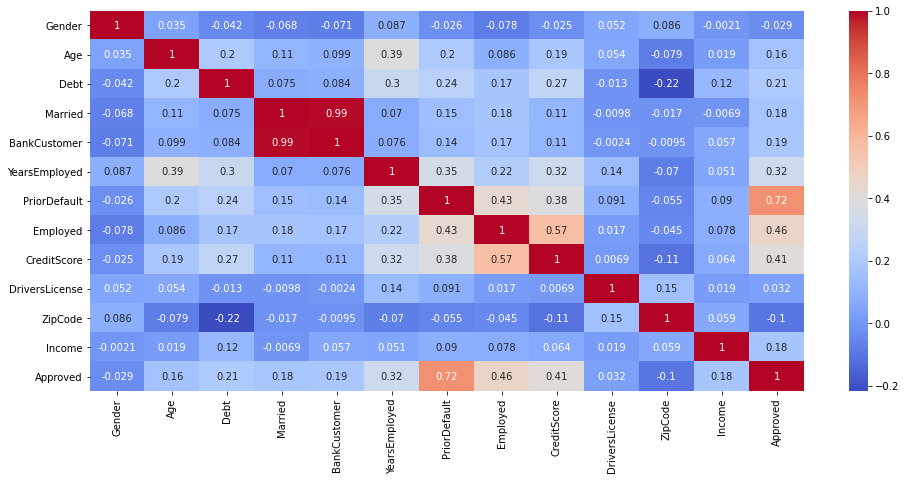

In [13]:
plt.figure(figsize=(16,7))
sns.heatmap(data =ms, annot =True,cmap='coolwarm')

# Data Visualization

In [14]:
# setting graphing format

plt.rcParams['figure.figsize'] = (10, 8)
font_fmt = {'fontweight': 'bold',
           'fontsize': 20}

In [15]:
df.head()


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [16]:
numeric_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
boolean_cols = ['Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 'DriversLicense', 'Approved']
string_cols = ['Industry', 'Ethnicity', 'Citizen']

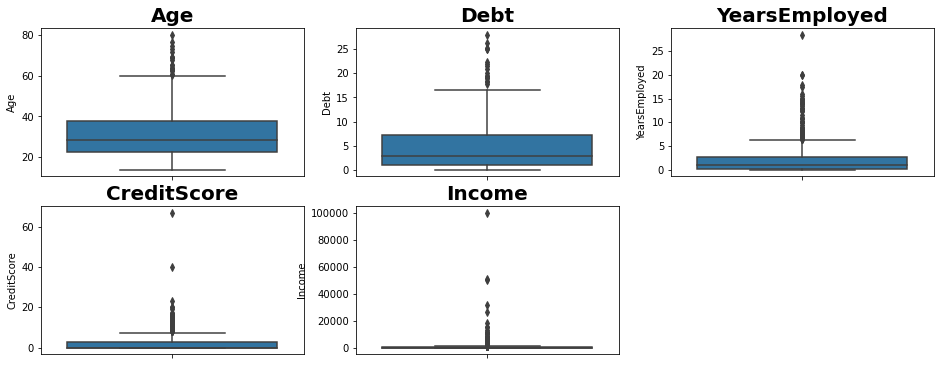

In [17]:
plt.figure(figsize=(16,6))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot}', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot)

In [18]:
for col in numeric_cols:
    print(f'--- {col} ---')
    print(df[col].describe())
    print('\n')

--- Age ---
count    690.000000
mean      31.514116
std       11.860245
min       13.750000
25%       22.670000
50%       28.460000
75%       37.707500
max       80.250000
Name: Age, dtype: float64


--- Debt ---
count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: Debt, dtype: float64


--- YearsEmployed ---
count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: YearsEmployed, dtype: float64


--- CreditScore ---
count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: CreditScore, dtype: float64


--- Income ---
count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.5

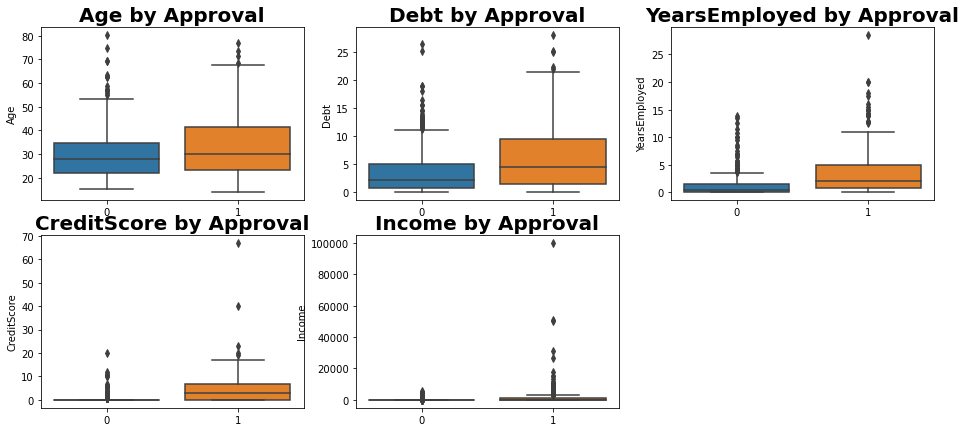

In [19]:
plt.figure(figsize=(16, 7))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot} by Approval', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot, x='Approved')
    plt.xlabel('')


plt.show()

In [20]:
for col in numeric_cols:
    for a in range(2):
        if a == 0:
            print(f'--- {col} (Not Approved) ---')
        else:
            print(f'--- {col} (Approved) ---')
        print(df[col][df['Approved']==a].describe())
        print('\n')

--- Age (Not Approved) ---
count    383.000000
mean      29.773029
std       10.777571
min       15.170000
25%       22.125000
50%       27.670000
75%       34.790000
max       80.250000
Name: Age, dtype: float64


--- Age (Approved) ---
count    307.000000
mean      33.686221
std       12.774745
min       13.750000
25%       23.210000
50%       30.170000
75%       41.330000
max       76.750000
Name: Age, dtype: float64


--- Debt (Not Approved) ---
count    383.000000
mean       3.839948
std        4.337662
min        0.000000
25%        0.835000
50%        2.210000
75%        5.000000
max       26.335000
Name: Debt, dtype: float64


--- Debt (Approved) ---
count    307.000000
mean       5.904951
std        5.471485
min        0.000000
25%        1.500000
50%        4.460000
75%        9.520000
max       28.000000
Name: Debt, dtype: float64


--- YearsEmployed (Not Approved) ---
count    383.000000
mean       1.257924
std        2.120481
min        0.000000
25%        0.125000
50%    

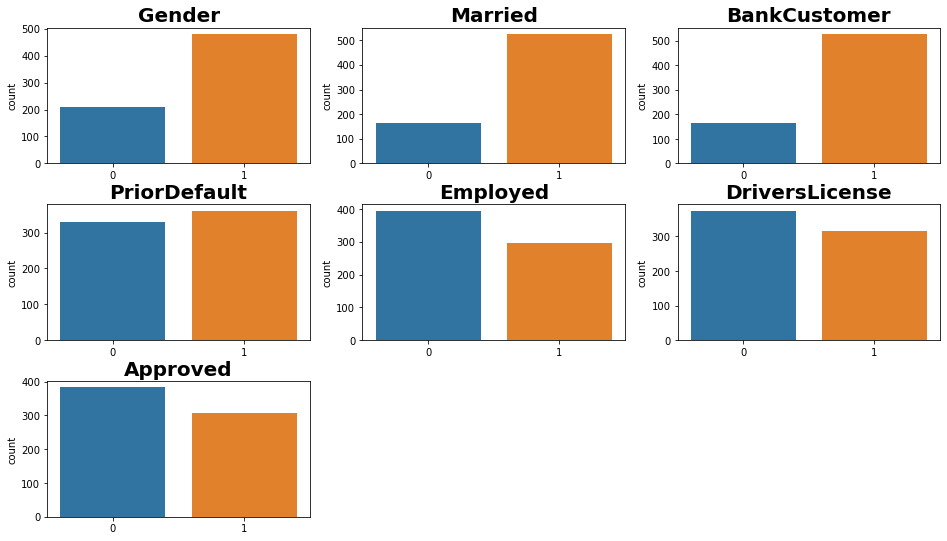

In [21]:
plt.figure(figsize=(16, 9))

for i, plot in enumerate(boolean_cols):
    plt.subplot(int(f'33{i+1}'))
    plt.title(plot, fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.3)
    sns.countplot(x=df[plot])
    plt.xlabel('')

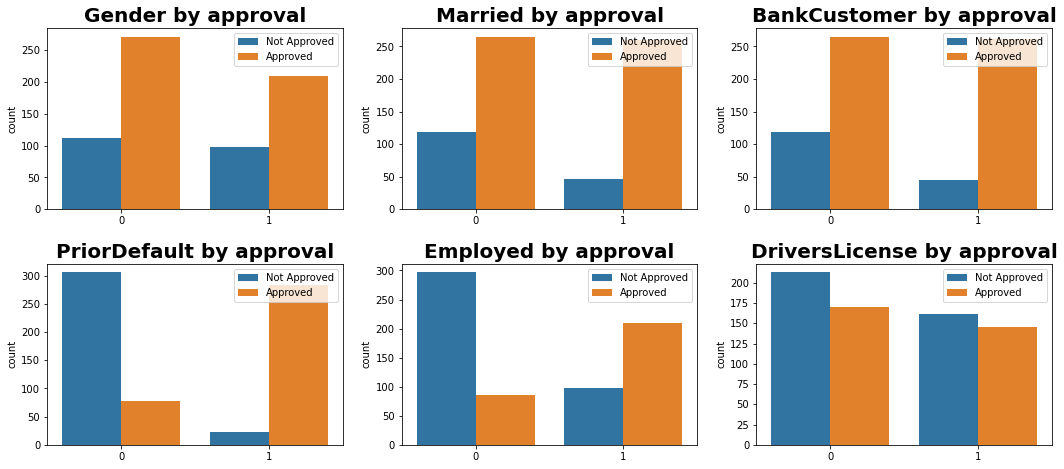

In [22]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(boolean_cols):
    if plot != 'Approved':
        plt.subplot(int(f'33{i+1}'))
        plt.title(f'{plot} by approval', fontdict=font_fmt)
        plt.subplots_adjust(hspace=0.3)
        sns.countplot(data=df, x='Approved', hue=plot)
        plt.xlabel('')
        plt.legend(['Not Approved', 'Approved'], loc='upper right')

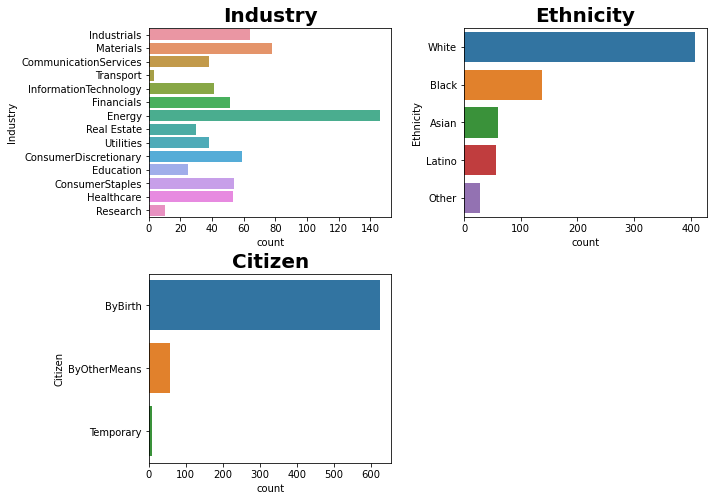

In [23]:
for i, plot in enumerate(string_cols):
    if plot != 'ZipCode':
        plt.subplot(int(f'22{i+1}'))
        plt.title(f'{plot}', fontdict=font_fmt)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        sns.countplot(y=df[plot])


<Figure size 576x576 with 0 Axes>

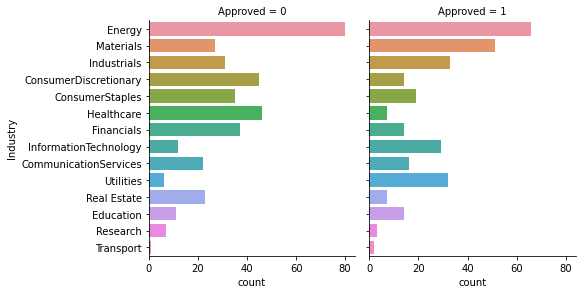

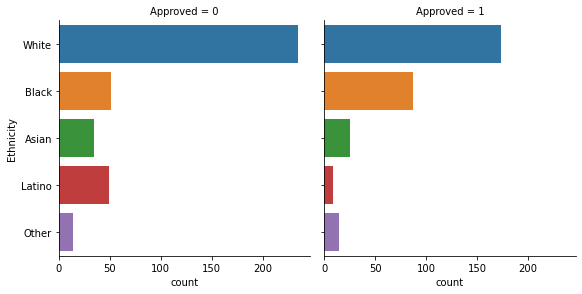

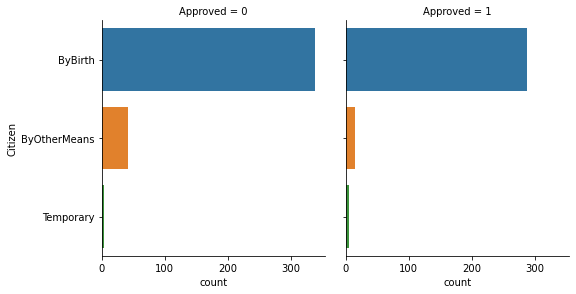

In [24]:
plt.figure(figsize=(8, 8))

for i, plot in enumerate(string_cols):
    sns.catplot(y=plot, col="Approved",
                data=df, kind="count",
                height=4, aspect=1,
                order=df[plot].value_counts().index)

# Key Findings

-Based on descriptive analysis, YearsEmployed, CreditScore, and Income might affect creidt card approval chance; the higher the numbers, the higher the chance of approval.

-PriorDefault and Employed also seem to be significant factors in determining approval status. Having prior default or defaults increases the chance of approval. Being employed also increases the chance of approval.


# Data Wrangling

In [25]:
df.head()


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [26]:

df_copy = df.drop(string_cols, axis=1)
df_copy.drop('ZipCode', axis=1, inplace=True)
print(string_cols)
df_copy.head()

['Industry', 'Ethnicity', 'Citizen']


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,0,1


In [27]:
# splitting X (variables) and y (output)
X = df_copy.drop('Approved', axis=1)
y = df_copy['Approved']

In [28]:
# rescaling data
sc = MinMaxScaler(feature_range=(0,1))

X = sc.fit_transform(X)

# Machine Learning model

 we will evaluate different classification models to see which product the best accuracy score in this dataset.



In [39]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    scoring = f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(),4)})"
    print(scoring)

LR: 0.8449 (0.1936)
KNN: 0.8029 (0.1699)
DT: 0.7652 (0.1359)
NB: 0.7725 (0.1363)
SVM: 0.8391 (0.1928)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model = LogisticRegression()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for Logistic Regression model: {accuracy}')

Accuracy score for Logistic Regression model: 0.8985507246376812


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model = KNeighborsClassifier()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for KNeighbors Classifier  model: {accuracy}')

Accuracy score for KNeighbors Classifier  model: 0.8115942028985508


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model =GaussianNB ()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for GaussianNB  Classifier  model: {accuracy}')

Accuracy score for GaussianNB  Classifier  model: 0.782608695652174


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model =SVC()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for SVM model: {accuracy}')

Accuracy score for SVM model: 0.9057971014492754


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model = DecisionTreeClassifier()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for DecisionTreeClassifier  model: {accuracy}')

Accuracy score for DecisionTreeClassifier  model: 0.8043478260869565


#  score for Logistic Regression model: 0.8449

#  score for KNeighbors Classifier model: 0.8029

#  score for DecisionTreeClassifier model: 0.7681

#  score for SVM  model: 0.8391

# score for GaussianNB  model: 0.7725







An accuracy score of 89.86% is very good.


# Conclusion

Our classification model has an accuracy of 84.50% . This model is fairly accurate in predicting whether to approve an applicant for a credit card or not.

In the banking industry, I think that this can be a good start in determining the reliability of an applicant for a credit card. However, in reality, there are different types and levels of credit card so each credit card would have a separate model to approve.